In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv', sep=',')
test = pd.read_csv('data/test.csv', sep=',')

data = pd.concat([train, test], axis=1)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. Exploratory Data Analysis

### Objectif :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation 

### Checklist de base
#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 
- **types de variables** : qualitatives : , quantitatives : 
- **analyse des valeurs manquantes** : 

#### Analyse de Fond :
- **Visualisation de la target** : 
    
- **Signification des variables** :
    - 

- **Relation Variables / Target** : 
    - 

**Conclusions** : 
    
    
### Analyse plus détaillée

- **Relation Variables / Variables** :
    - 

### hypotheses nulle (H0): 

- 
    - H0 = 
- 


### Analyse de la forme des données

In [4]:
df = data.copy()

In [5]:
df.shape

(42000, 1569)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 1569 entries, label to pixel783
dtypes: float64(784), int64(785)
memory usage: 502.8 MB


In [7]:
df.dtypes.value_counts()

int64      785
float64    784
dtype: int64

In [8]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
df.isna().sum()

label           0
pixel0          0
pixel1          0
pixel2          0
pixel3          0
            ...  
pixel779    14000
pixel780    14000
pixel781    14000
pixel782    14000
pixel783    14000
Length: 1569, dtype: int64

In [10]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

label       0.000000
pixel517    0.000000
pixel518    0.000000
pixel519    0.000000
pixel520    0.000000
              ...   
pixel263    0.333333
pixel264    0.333333
pixel265    0.333333
pixel267    0.333333
pixel783    0.333333
Length: 1569, dtype: float64

## Analyse du Fond
### 1. Visualisation de la variable target

C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

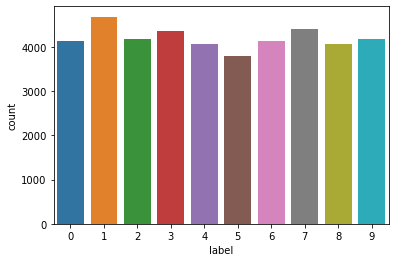

In [11]:
sns.countplot(df['label'])